# Cherry Leaves - Mildew Detection*

## Objectives

* find mean and standard deviation

## Inputs

* Train,validation and test set
## Outputs

* mean and standard deviation




---

# Setting up the Working directory

## Import Libraries needed

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

In [5]:
current_dir = os.getcwd()
current_dir

'/workspaces/cherry-leaves/jupyter_notebooks'

In [6]:
os.chdir('/workspaces/cherry-leaves')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [7]:
current_dir = os.getcwd()
current_dir

'/workspaces/cherry-leaves'

## Input directories

In [8]:
data_dir = 'input/full_dataset/cherry-leaves'
train_data_path = data_dir + '/train'
valid_data_path = data_dir + '/validation'
test_data_path = data_dir + '/test'

## Output directories


In [9]:
version = 'v1'
file_path = f'output/{version}'

if 'output' in os.listdir(current_dir) and version in os.listdir(current_dir + '/output'):
    print('Create a new version')
    pass
else:
    os.makedirs(name=file_path)

Create a new version


In [10]:
label = os.listdir(train_data_path)
print('These are the labels',label)

These are the labels ['healthy', 'powdery_mildew']


---

# Visualisation of image

Data Visualisation

healthy
powdery_mildew


NameError: name 'dim1_mean' is not defined

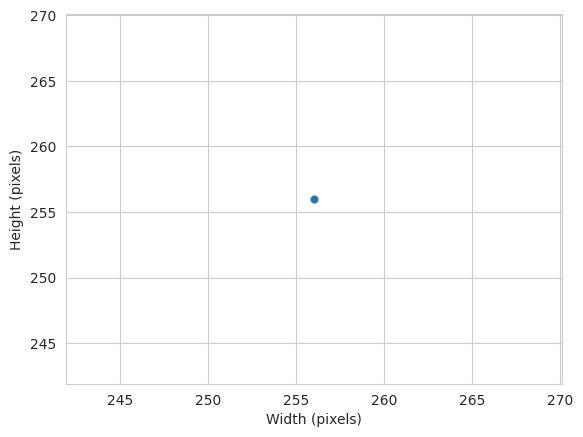

In [11]:
dim1, dim2 = [], []
for label_name in label:
    print(label_name)
for image_filename in os.listdir(train_data_path + '/' + label_name ):
    img = imread(train_data_path + '/' + label_name + '/'+ image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1) # image height
    dim2.append(d2) # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_avg = int(np.array(dim1).mean())
dim2_avg = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean,color='r', linestyle='--')
axes.axhline(y=dim2_mean,color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_avg} \nHeight average: {dim1_avg}")

In [ ]:
shape=(dim1_avg, dim2_avg, 3)
shape

In [ ]:
joblib.dump(value = shape, filename=f"{file_path}/shape.pk1")

In [ ]:
from tensorflow.keras.preprocessing import image

def img_array(data_dir, alt_size=(50,50), no_images = 20):
  x, y = np.array([], dtype='int'), np.array([], dtype='object')
  labels = os.listdir(data_dir)

  for label in labels:
    counter = 0
    for image_filename in os.listdir(data_dir + '/' + label):
      if counter < no_images:
        
        img = image.load_img(data_dir + '/' + label + '/' + image_filename, target_size=alt_size)
        if image.img_to_array(img).max() > 1: 
          new_img = image.img_to_array(img) / 255
        else: 
          new_img = image.img_to_array(img)
        
        x = np.append(x, new_img).reshape(-1, alt_size[0], alt_size[1], new_img.shape[2])
        y = np.append(y, label)
        counter += 1

  return x, y

In [ ]:
x, y = img_array(data_dir = train_data_path,
                 alt_size = shape,
                 no_images = 30)
print(x.shape, y.shape)

In [ ]:
def avg_sd(x, y, figsize=(12,5), save_image=False):

  for display_label in np.unique(y):
    sns.set_style("white")

    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==display_label,axis=1).reshape(-1)
    arr = x[boolean_mask]

    mean_img = np.mean(arr, axis = 0)
    std_img = np.std(arr, axis = 0)
    print(f"==== {display_label} ====")
    print(f"Shape: {mean_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for {display_label}")
    axes[0].imshow(mean_img, cmap='gray')
    axes[1].set_title(f"The standard deviation image for{display_label}")
    axes[1].imshow(std_img, cmap='gray')

    if save_image:
      plt.savefig(f"{file_path}/mean_var_{display_label}.png", bbox_inches='tight', dpi=150)
    else:
      plt.tight_layout()
      plt.show()
      print("\n")

In [ ]:
avg_sd(x=x, y=y, figsize=(12,5),save_image=True)

In [ ]:
def subset(x,y,label_to_display):
  y = y.reshape(-1,1,1)
  boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
  df = x[boolean_mask]
  return df


def array_diff_img(x, y, label_1, label_2, figsize=(20,5), save_image=False):
  sns.set_style("white")

  if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
    print(f"Either the label - {label_1} - or the label - {label_2} - are not in {np.unique(y)} ")
    return

  # calculate mean from all and then plot difference
  images_label = subset(x, y, label_1)
  label1_avg = np.mean(images_label, axis = 0)


  images_label = subset(x, y, label_2)
  label2_avg = np.mean(images_label, axis = 0)


  diff_mean = label1_avg - label2_avg
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
  axes[0].imshow(label1_avg, cmap='gray')
  axes[0].set_title(f'Average {label_1}')
  axes[1].imshow(label2_avg, cmap='gray')
  axes[1].set_title(f'Average {label_2}')
  axes[2].imshow(diff_mean, cmap='gray')
  axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')
  if save_image:
    plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
  else:
    plt.tight_layout()
    plt.show()


In [ ]:
array_diff_img(x=x, y=y,
               label_1='Mildew',
               label_2='Healthy',
               figsize=(12,10),
               save_image=True)

## Montage

In [ ]:
import itertools
import random
sns.set_style("white")

def montage(dir_path, display_label, nrows, ncols, figsize=(15,10)):
  

  labels = os.listdir(dir_path)

  # subset the class you are interested to display
  if display_label in labels:

    # checks if your montage space is greater than subset size
    images_list = os.listdir(dir_path+'/'+ display_label)
    if nrows * ncols < len(images_list):
      img_idx = random.sample(images_list, nrows * ncols)
    else:
      print(
          f"Decrease nrows or ncols to create your montage. \n"
          f"There are {len(images_list)} in your subset. "
          f"You requested a montage with {nrows * ncols} spaces")
      return
    

    # create list of axes indices based on nrows and ncols
    list_rows= range(0,nrows)
    list_cols= range(0,ncols)
    plot_idx = list(itertools.product(list_rows,list_cols))


    # create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
    for x in range(0,nrows*ncols):
      img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
      img_shape = img.shape
      axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
      axes[plot_idx[x][0], plot_idx[x][1]].set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
      axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
      axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
    plt.tight_layout()
    plt.show()


  else:
    print("The label you selected doesn't exist.")
    print(f"The existing options are: {labels}")

In [12]:
for label in labels:
  print(label)
  image_montage(dir_path= train_path,
                label_to_display= label,
                nrows=3, ncols=3,
                figsize=(10,15)
                )
  print("\n")

NameError: name 'labels' is not defined

---